## **Storytelling Network Analysis**

**Background:**

This notebook aims to perform the next step of our project. We will plot a **similarity network** according to the **storytelling** of each company. To do that, we will use the Tweet posts extracted and processed during the Sentiment Analysis.

**Dataset:**

We will start from the **Tweet Posts Dataset** and get the mean values of each variable by Brand. 

**Resources:**

*   Pandas documentation: https://pandas.pydata.org/docs/#
*   DataCamp course: https://app.datacamp.com/learn/courses/analyzing-social-media-data-in-python
*   Data Science for Business Applications course - Copenhagen Business School
*   Holoviews documentation: http://holoviews.org/user_guide/Network_Graphs.html


## **Introduction: Libraries and Drive** 

In [ ]:
# Import all needed libraries
import tweepy                   # Python wrapper around Twitter API
from google.colab import drive  # to mount Drive to Colab notebook

import pandas as pd
pd.set_option('display.max_colwidth', None) #to see more text
import json 
import csv
from datetime import date
from datetime import datetime
import time
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()

from textblob import TextBlob
from wordcloud import WordCloud
import string
import itertools
from collections import Counter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Connect Google Drive to Colab
drive.mount('/content/gdrive')
# Create a variable to store the data path on your drive
path = './gdrive/My Drive/path/to/data'

Mounted at /content/gdrive


## **Set the Social Network**

### **Intall needed libraries**

In [ ]:
# import essential libraries

%%capture
import networkx as nx  #for the manipulation of networks 
import numpy as np  #for useful maths functions
import pandas as pd  #for the manipulation of dataframes 
import seaborn as sns  #for visualization
import matplotlib.pyplot as plt  #for visualization
from scipy import sparse  #for high-level functions
import community.community_louvain as community_louvain  #community detection inside networks
from sklearn.metrics.pairwise import cosine_distances  #cosine distance between two variables
sns.set(color_codes=True, rc={'figure.figsize':(10,8)})  #set seaborn
sns.set()

In [ ]:
# install datashader

%%capture
!pip install -qq datashader

In [ ]:
# import the network visualization libraries and backend

import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show
kwargs = dict(width=800, height=800, xaxis=None, yaxis=None)
opts.defaults(opts.Nodes(**kwargs), opts.Graph(**kwargs))
from holoviews.operation.datashader import datashade, bundle_graph

Output hidden; open in https://colab.research.google.com to view.

### **Set the Dataset and Scale values**

In [ ]:
# Load Dataset
dftweets = pd.read_csv('/content/drive/MyDrive/Final Project/2. Sentiment Analysis/Tweet_Posts.csv')
dftweets.head()

In [ ]:
# Set the Network Dataset
dftweets_net = dftweets.iloc[:,[1,8,9,10,11,12,13,14,15]]
dftweets_net.head()

,brand,subjectivity,polarity,nb_words,text_len,negative,neutral,positive,compound
0,Cartier,0.00,0.00,19,110,0.000,1.000,0.000,0.0000
1,Cartier,0.50,0.00,15,91,0.000,1.000,0.000,0.0000
2,Cartier,0.50,0.25,19,105,0.000,0.737,0.263,0.6908
3,Cartier,0.45,-0.05,19,107,0.205,0.438,0.357,0.5423
4,Cartier,0.00,0.00,20,110,0.000,1.000,0.000,0.0000


In [ ]:
# Get the mean of each variable for all Brands
dftweets_net = dftweets_net.groupby(['brand']).mean()
dftweets_net.reset_index(inplace=True)
dftweets_net.head(5)

,brand,subjectivity,polarity,nb_words,text_len,negative,neutral,positive,compound
0,BALENCIAGA,0.000000,0.000000,8.785714,68.071429,0.000000,1.000000,0.000000,0.000000
1,BenefitBeauty,0.410326,0.232698,8.416538,48.190682,0.026861,0.616965,0.258678,0.310477
2,Boucheron,0.365159,0.179372,13.162429,83.838090,0.013025,0.826264,0.158117,0.281332
3,Bulgariofficial,0.373890,0.203347,13.314198,85.194136,0.009080,0.788926,0.201688,0.371378
4,Burberry,0.276546,0.107133,13.772938,89.389249,0.006502,0.912383,0.081116,0.158115


In [ ]:
# Scale values

from sklearn.preprocessing import MinMaxScaler

scl = MinMaxScaler()

data_num = scl.fit_transform(dftweets_net.iloc[:,1:])

### **Reiterate Market Network Methodology**

In [ ]:
# Calculate distances into a square matrix
dist = cosine_distances(data_num,data_num)

dist

array([[0.        , 1.        , 0.57379533, ..., 0.77410171, 0.58051965,
        0.55349283],
       [1.        , 0.        , 0.2043349 , ..., 0.0349988 , 0.17694795,
        0.26548958],
       [0.57379533, 0.2043349 , 0.        , ..., 0.1044732 , 0.01399381,
        0.00964329],
       ...,
       [0.77410171, 0.0349988 , 0.1044732 , ..., 0.        , 0.10002923,
        0.14308051],
       [0.58051965, 0.17694795, 0.01399381, ..., 0.10002923, 0.        ,
        0.04477514],
       [0.55349283, 0.26548958, 0.00964329, ..., 0.14308051, 0.04477514,
        0.        ]])

In [ ]:
# calculate a cutoff (for a less crowded network)
perc = np.percentile(1-dist, 60)

perc

0.9617611045842915

In [ ]:
# create NW
G = nx.from_numpy_array(1-dist)

In [ ]:
# add names
attributes_dict=dftweets_net.T.to_dict()

attributes_dict

{0: {'brand': 'BALENCIAGA',
  'compound': 0.0,
  'nb_words': 8.785714285714286,
  'negative': 0.0,
  'neutral': 1.0,
  'polarity': 0.0,
  'positive': 0.0,
  'subjectivity': 0.0,
  'text_len': 68.07142857142857},
 1: {'brand': 'BenefitBeauty',
  'compound': 0.31047741437827736,
  'nb_words': 8.416538105522987,
  'negative': 0.026860536871335973,
  'neutral': 0.6169654427645802,
  'polarity': 0.2326975220461031,
  'positive': 0.2586781857451408,
  'subjectivity': 0.4103261988077637,
  'text_len': 48.19068188830608},
 2: {'brand': 'Boucheron',
  'compound': 0.2813320186818888,
  'nb_words': 13.162428645563052,
  'negative': 0.013025428126621703,
  'neutral': 0.8262641411520519,
  'polarity': 0.17937204734650783,
  'positive': 0.1581172807472756,
  'subjectivity': 0.365158959221436,
  'text_len': 83.83809029579658},
 3: {'brand': 'Bulgariofficial',
  'compound': 0.3713784876543216,
  'nb_words': 13.314197530864197,
  'negative': 0.00907962962962963,
  'neutral': 0.7889256172839482,
  'pola

In [ ]:
# Set nodes attributes
nx.set_node_attributes(G, attributes_dict)

In [ ]:
print(nx.info(G))
# Get rid of low-weight edges
G_sub = nx.edge_subgraph(G, [(u,v) for u,v,d in G.edges(data=True) if d['weight'] > perc])
print(nx.info(G_sub))

Graph with 40 nodes and 819 edges
Graph with 40 nodes and 340 edges


In [ ]:
# Set centrality degree
centrality_dgr = nx.degree_centrality(G_sub)
centrality_dgr = pd.DataFrame({'centrality_dgr':centrality_dgr})
centrality_dgr = centrality_dgr.to_dict('index')
nx.set_node_attributes(G_sub, centrality_dgr)

In [ ]:
G_sub.nodes[0]['centrality_dgr']

0.05128205128205128

### **Plot and Analyze the Social Network**

In [ ]:
# identify communities (optional)
partition = community_louvain.best_partition(G_sub)
nx.set_node_attributes(G_sub, partition, 'partition')

In [ ]:
position = nx.spring_layout(G_sub)
graph = hv.Graph.from_networkx(G_sub, position).opts(
                                                                        tools=['hover'],
                                                                        edge_alpha=0.15,
                                                                        node_size=13,
                                                                        node_color='partition', cmap='Set1',
                                                                        legend_position='right'
                                                                        )

labels = hv.Labels(graph.nodes, ['x', 'y'])

show(hv.render((graph * labels.opts(text_font_size='0pt', text_color='black', xoffset=-0.01, 
                                    yoffset=-0.04, bgcolor='white', padding=0.2))))

In [ ]:
# Let's use bundle_graph for a better visual

from holoviews.operation.datashader import datashade, bundle_graph
bundled = bundle_graph(graph)
show(hv.render(bundled))

In [ ]:
# Network structure metrics
print(nx.density(G_sub))
print(nx.transitivity(G_sub))

0.4358974358974359
0.7879387938793879


## **Investigation and Output Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Get Partition and Centrality values
partition_values = [partition.get(node) for node in G_sub.nodes]

centrality_dgr = nx.degree_centrality(G_sub)
centrality_values = [centrality_dgr.get(node) for node in G_sub.nodes]

In [ ]:
# Put Partition and Centrality values into the DataFrame
dftweets_net['Partition'] = partition_values
dftweets_net['Centrality'] = centrality_values

# Inspect
dftweets_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         40 non-null     object 
 1   subjectivity  40 non-null     float64
 2   polarity      40 non-null     float64
 3   nb_words      40 non-null     float64
 4   text_len      40 non-null     float64
 5   negative      40 non-null     float64
 6   neutral       40 non-null     float64
 7   positive      40 non-null     float64
 8   compound      40 non-null     float64
 9   Partition     40 non-null     int64  
 10  Centrality    40 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 3.6+ KB


In [ ]:
dftweets_net.head(5)

,Unnamed: 0,brand,subjectivity,polarity,nb_words,text_len,negative,neutral,positive,compound,Partition,Centrality
0,0,BALENCIAGA,0.000000,0.000000,8.785714,68.071429,0.000000,1.000000,0.000000,0.000000,0,0.051282
1,1,BenefitBeauty,0.410326,0.232698,8.416538,48.190682,0.026861,0.616965,0.258678,0.310477,3,0.076923
2,2,Boucheron,0.365159,0.179372,13.162429,83.838090,0.013025,0.826264,0.158117,0.281332,2,0.692308
3,3,Bulgariofficial,0.373890,0.203347,13.314198,85.194136,0.009080,0.788926,0.201688,0.371378,3,0.615385
4,4,Burberry,0.276546,0.107133,13.772938,89.389249,0.006502,0.912383,0.081116,0.158115,4,0.282051


In [ ]:
dftweets_net.groupby('Partition').mean()

,subjectivity,polarity,nb_words,text_len,negative,neutral,positive,compound,Centrality
Partition,,,,,,,,,
0,0.000000,0.000000,8.785714,68.071429,0.000000,1.000000,0.000000,0.000000,0.051282
1,0.220635,0.033463,15.780000,102.542154,0.029714,0.922061,0.047606,0.041902,0.051282
2,0.360607,0.185352,13.209806,84.268049,0.010861,0.835212,0.152521,0.276950,0.597756
3,0.413201,0.215567,12.801953,77.055008,0.018193,0.744998,0.221479,0.359604,0.382051
4,0.284709,0.128334,14.166863,90.043504,0.009818,0.904502,0.083488,0.161358,0.329060


In [ ]:
dftweets_net[['brand','Partition','Centrality']].sort_values('Centrality', ascending=False).head(5)

,brand,Partition,Centrality
21,RalphLauren,4,0.717949
2,Boucheron,2,0.692308
27,alfreddunhill,2,0.666667
13,Hublot,2,0.666667
20,Piaget,3,0.641026


In [ ]:
dftweets_net[['brand','Partition','compound']].sort_values('compound', ascending=False).head(5)

,brand,Partition,compound
28,baumeetmercier,3,0.421729
23,TAGHeuer,3,0.384570
36,petermillar,3,0.382898
3,Bulgariofficial,3,0.371378
35,montblanc_world,3,0.369975


In [ ]:
dftweets_net[['brand','Partition','polarity']].sort_values('polarity', ascending=False).head(5)

,brand,Partition,polarity
28,baumeetmercier,3,0.243027
36,petermillar,3,0.236951
17,Makeupforever,3,0.234701
1,BenefitBeauty,3,0.232698
20,Piaget,3,0.224730


In [ ]:
dftweets_net[['brand','Partition','subjectivity']].sort_values('subjectivity', ascending=False).head(5)

,brand,Partition,subjectivity
23,TAGHeuer,3,0.461227
35,montblanc_world,3,0.450733
9,Fendi,2,0.448269
17,Makeupforever,3,0.437421
20,Piaget,3,0.436399


In [ ]:
dftweets_net[['brand','Partition','nb_words']].sort_values('nb_words', ascending=False).head(5)

,brand,Partition,nb_words
7,Dior,4,16.273231
18,McQueen,1,15.780000
11,Gucci,4,15.680000
33,kenzo,4,15.609227
29,chloefashion,4,15.520661


In [ ]:
dftweets_net[['brand','Partition','text_len']].sort_values('text_len', ascending=False).head(5)

,brand,Partition,text_len
18,McQueen,1,102.542154
7,Dior,4,100.400923
11,Gucci,4,99.945846
16,LouisVuitton,4,98.551077
29,chloefashion,4,98.132231


In [ ]:
# Export the Dataset
dftweets_net.to_csv('NLP Similarities.csv')

## **Variables Analysis**

To have a better illustration of Partitions differences, I decided to go further in Visual Analytics. I found some tutorials, especially regarding **paiplot**, to help me on that. 

In [ ]:
# Necessary settings
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

In [ ]:
# Load data
visu_tw = pd.read_csv('/content/drive/MyDrive/Final Project/3. Storytelling Network Analysis/NLP Similarities.csv')
visu_tw.head()

,Unnamed: 0,brand,subjectivity,polarity,nb_words,text_len,negative,neutral,positive,compound,Partition,Centrality
0,0,BALENCIAGA,0.000000,0.000000,8.785714,68.071429,0.000000,1.000000,0.000000,0.000000,0,0.051282
1,1,BenefitBeauty,0.410326,0.232698,8.416538,48.190682,0.026861,0.616965,0.258678,0.310477,3,0.076923
2,2,Boucheron,0.365159,0.179372,13.162429,83.838090,0.013025,0.826264,0.158117,0.281332,2,0.692308
3,3,Bulgariofficial,0.373890,0.203347,13.314198,85.194136,0.009080,0.788926,0.201688,0.371378,3,0.615385
4,4,Burberry,0.276546,0.107133,13.772938,89.389249,0.006502,0.912383,0.081116,0.158115,4,0.282051


In [ ]:
visu_tw.groupby('Partition').mean()

,Unnamed: 0,subjectivity,polarity,nb_words,text_len,negative,neutral,positive,compound,Centrality
Partition,,,,,,,,,,
0,0.000000,0.000000,0.000000,8.785714,68.071429,0.000000,1.000000,0.000000,0.000000,0.051282
1,18.000000,0.220635,0.033463,15.780000,102.542154,0.029714,0.922061,0.047606,0.041902,0.051282
2,19.562500,0.360607,0.185352,13.209806,84.268049,0.010861,0.835212,0.152521,0.276950,0.597756
3,20.500000,0.413201,0.215567,12.801953,77.055008,0.018193,0.744998,0.221479,0.359604,0.382051
4,20.333333,0.284709,0.128334,14.166863,90.043504,0.009818,0.904502,0.083488,0.161358,0.329060


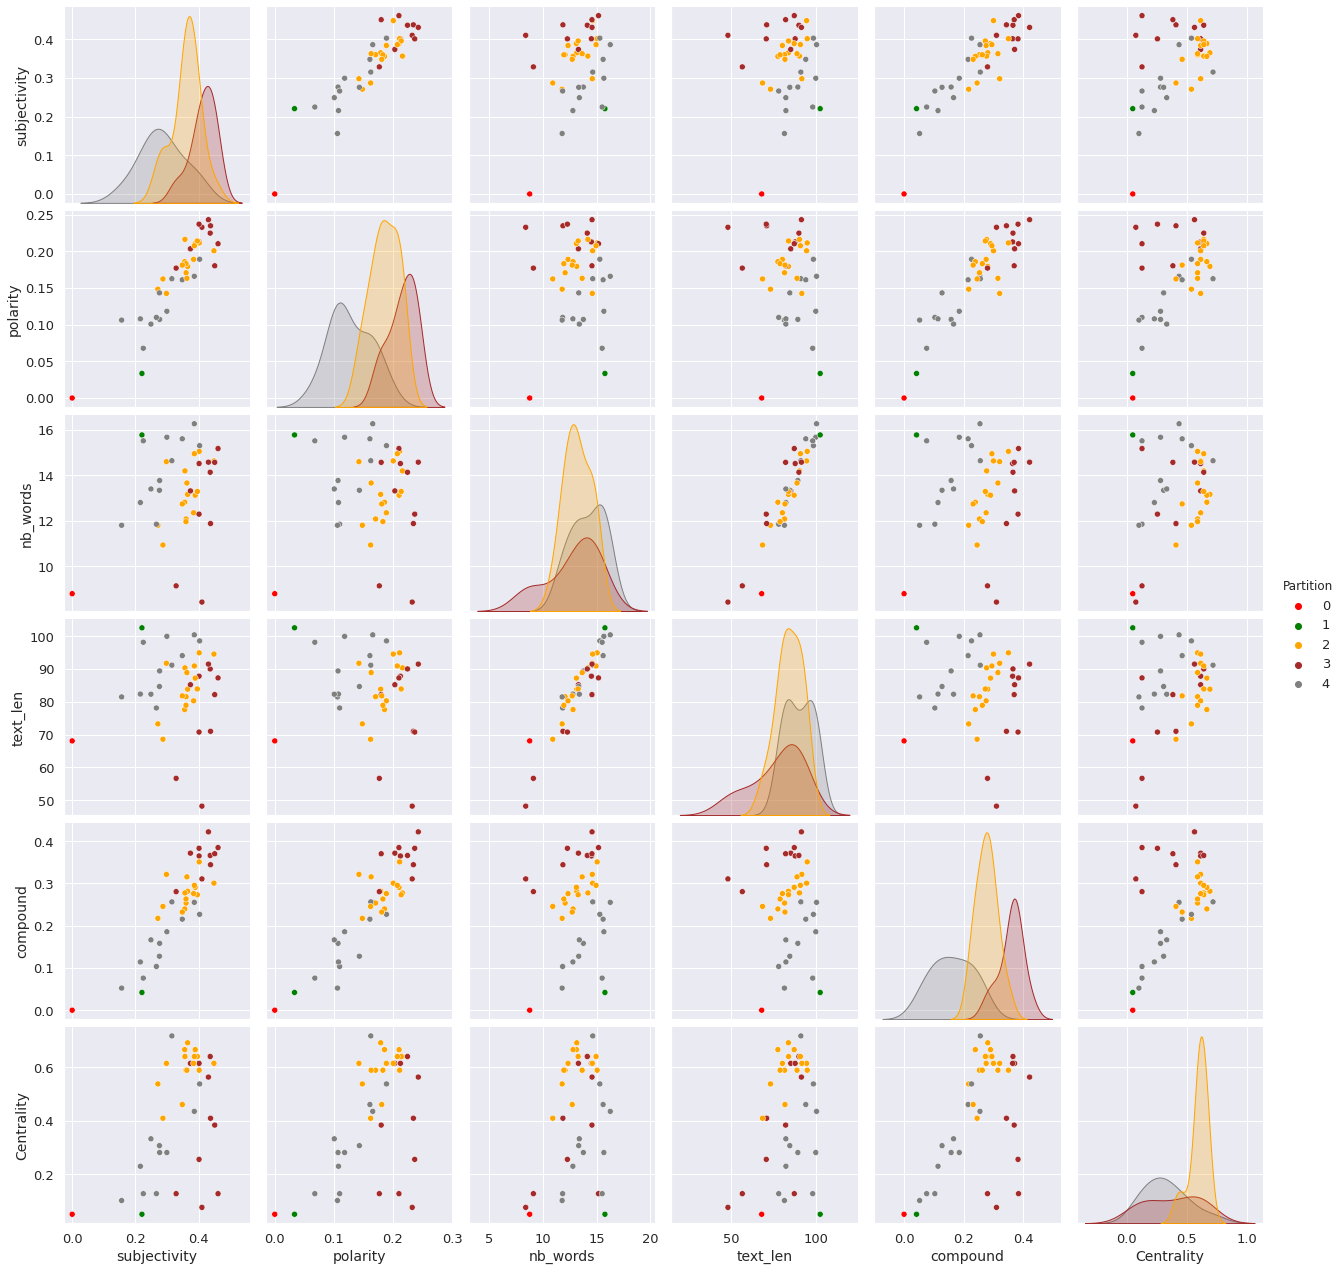

In [ ]:
# Look at variables relation
colors = ['red','green','orange','brown','grey']
sns.pairplot(visu_tw, vars= ['subjectivity', 'polarity', 'nb_words', 'text_len',
                             'compound','Centrality'], height=3, hue='Partition', palette=colors)